In [95]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import spatial
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
file = open('sentences.txt', mode = 'r')  # reading file
text = file.read().lower()

text = np.array(re.split('[^a-z]', text)) # creating a numpy array containing words from text file

bool_array = True ^ (text == '')
text = text[bool_array] # deleting empty words

In [78]:
# creating a numpy "list of lists", where first list contains lines of the source file
file = open('sentences.txt', mode = 'r')
lines = []
for line in file:
    lines.append(np.array(re.split('[^a-z]', line.strip().lower())))
    bool_array_lines = True ^ (lines[-1] == '')
    lines[-1] = lines[-1][bool_array_lines]
lines = np.array(lines)

In [79]:
# creating a dictionary of all words encountered
words = dict()  

i = 0
for word in text:
    if word not in words.values():
        words[i] = word
        i += 1

In [80]:
n = 22   # number of lines
d = len(words)   # 254

M = np.zeros((22, 254))

for i in range(n):
    for j in range(d):
        M[i, j] = (lines[i] == words[j]).astype(int).sum()

print(M)

[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 1. 1. 1.]]


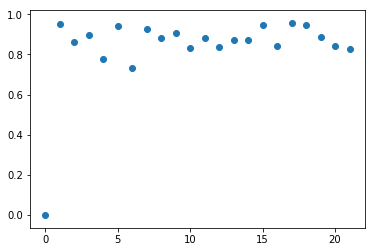

In [101]:
# finding cosine distance between first sentence and other in the file

cosine_distance = np.zeros(22)

x = M[0].reshape(1, 254)

for i in range(22):
    cosine_distance[i] = spatial.distance.cosine(x, M[i].reshape(1, 254))

X = np.arange(0, 22)
Y = cosine_distance

plt.scatter(X, Y)

In [111]:
answer = '4 6'
submission_1 = open('submission-1.txt', mode = 'w')
submission_1.write(answer)

3